In [222]:
%load_ext autoreload
%autoreload 2

import time
from sympy import *
from safe_region_utils import *
from symbolic_utils import *
init_printing()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ACAS X Example with Rectangle

In [223]:
rect_points

In [231]:
params = []

In [241]:
def full_acas_x_example(params=[]):
    t0 = time.time()
    x, y = symbols("x y")
    w = Symbol("w", real=True, positive=True, nonzero=True)
    h = Symbol("h", real=True, positive=True, nonzero=True)
    rect_points: list = [
        geometry.Point(val) for val in [[w, -h], [w, h], [-w, h], [-w, -h]]
    ]
    rect_param: geometry.Polygon = Polygon(*rect_points)
    c = Symbol("c", real=True, nonzero=True) # curvature
    b = Symbol('b', real=True, positive=True) # boundary
    # b = Symbol('b', real=True) # boundary


    # TODO: change trajectory to not have notch at x=0
    traj_piecewise = Piecewise(
                        (c*x**2, x < b),
                        (2*b*c*(x-b) + b**2*c, x >= b),
                    )
    
    piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]
    piecewise_intervals = [sub_int.subs(params) for sub_int in piecewise_intervals]
    
    clauses_acas, explicit_acas = compute_unsafe_conds_symbolic(
        x, y,
        rect_param.subs(params),
        traj_piecewise.subs(params),
        domain=Reals,
        intervals = piecewise_intervals,
    )
    symbolic_time = time.time() - t0
    print(f"Took {symbolic_time} seconds to compute symbolic safe region")
    inst_begin_time = time.time()
    
    numeric_params = dict([(c, 0.25), (b, 2), (w, 2), (h, 1)])
    for (k, v) in params:
        if k in numeric_params:
            numeric_params.pop(k)
            
    numeric_acas = explicit_acas.instantiate(list(numeric_params.items()))
    inst_duration = time.time() - inst_begin_time
    total_duration = time.time() - t0
#     print(f"Took {time.time() - t0} seconds to instantiate")
#     print(numeric_acas.ordering)
#     numeric_acas.clause
    print(f"Took {inst_duration} seconds to instantiate and {total_duration} seconds total.")
    return symbolic_time, inst_duration, total_duration

In [243]:
full_acas_x_example()

Took 0.3313920497894287 seconds to compute symbolic safe region
Took 0.0005581378936767578 seconds to instantiate and 0.33202409744262695 seconds total.


In [244]:
params = [(c, 0.25), (b, 2)]
full_acas_x_example(params)

Took 0.2798631191253662 seconds to compute symbolic safe region
Took 0.012840032577514648 seconds to instantiate and 0.2927742004394531 seconds total.


In [245]:
params = [(w, 2), (h, 1)]
full_acas_x_example(params)

Took 0.2816588878631592 seconds to compute symbolic safe region
Took 0.049610137939453125 seconds to instantiate and 0.3313479423522949 seconds total.


In [246]:
params = [(c, 0.25), (b, 2), (w, 2), (h, 1)]
full_acas_x_example(params)

Took 0.07285189628601074 seconds to compute symbolic safe region
Took 0.0003561973571777344 seconds to instantiate and 0.07329726219177246 seconds total.


In [3]:
x, y = symbols("x y")
w = Symbol("w", real=True, positive=True, nonzero=True)
h = Symbol("h", real=True, positive=True, nonzero=True)
rect_points: list = [
    geometry.Point(val) for val in [[w, -h], [w, h], [-w, h], [-w, -h]]
]
rect_param: geometry.Polygon = Polygon(*rect_points)

In [59]:
simplify(2*b*c*(x-b) + b**2*c)

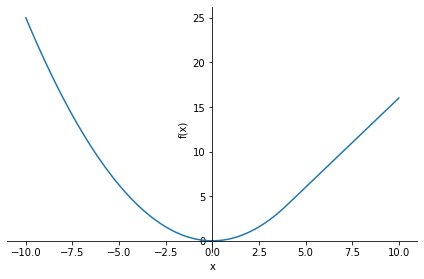

⎧           2                    
⎪        c⋅x            for b > x
⎨                                
⎪ 2                              
⎩b ⋅c + 2⋅b⋅c⋅(-b + x)  otherwise

In [4]:
c = Symbol("c", real=True, nonzero=True) # curvature
b = Symbol('b', real=True, positive=True) # boundary
# b = Symbol('b', real=True) # boundary


# TODO: change trajectory to not have notch at x=0
traj_piecewise = Piecewise(
                    (c*x**2, x < b),
                    (2*b*c*(x-b) + b**2*c, x >= b),
                )
plot(traj_piecewise.subs(c, 0.25).subs(b, 4))
traj_piecewise

In [5]:
piecewise_intervals = [Interval(-oo, b), Interval(b, oo)]

In [6]:
clauses_acas, explicit_acas = compute_unsafe_conds_symbolic(
    x, y,
    rect_param,
    traj_piecewise,
    domain=Reals,
    intervals = piecewise_intervals,
    print_runtime=True,
    print_orderings=True,
)

[Boundary(-oo, oo*c),
Transition(0, 0),
Boundary(b, b**2*c),
Boundary(oo, b**2*c + oo*c)]

Took 0.0007829666137695312 seconds to compute 1 possible orderings.
Took 0.20821785926818848 seconds to compute 1 clauses


In [13]:
params = [(c, 0.25), (b, 2), (w, 2), (h, 1)]
t0 = time.time()
numeric_acas = explicit_acas.instantiate(params)
print(f"Took {time.time() - t0} seconds to instantiate")
print(numeric_acas.ordering)
numeric_acas.clause

Took 0.10971593856811523 seconds to instantiate
[Boundary(-oo, oo*c), Transition(0, 0), Boundary(b, b**2*c), Boundary(oo, b**2*c + oo*c)]


                                                                                                        
                                                                                                        
⎛                  ⎛    ⎛⎧    1.0      for x < 0⎞    ⎞ ⎛    ⎛⎧    1.0      for x < 4⎞    ⎞    ⎞   ⎛     
⎜x ≥ 0 ∧ x ≥ 2⋅y ∧ ⎜y - ⎜⎨                      ⎟ + 1⎟⋅⎜y - ⎜⎨                      ⎟ - 1⎟ ≤ 0⎟ ∨ ⎜x ≥ 0
⎝                  ⎝    ⎝⎩1.0⋅x + 1.0  for x ≤ ∞⎠    ⎠ ⎝    ⎝⎩1.0⋅x - 3.0  for x ≤ ∞⎠    ⎠    ⎠   ⎝     
                                                                                                        
                                                                                                        

                                                                                                        
                                                                                                  ⎛     
                   ⎛    ⎛⎧    1.0      for x < 0⎞    ⎞

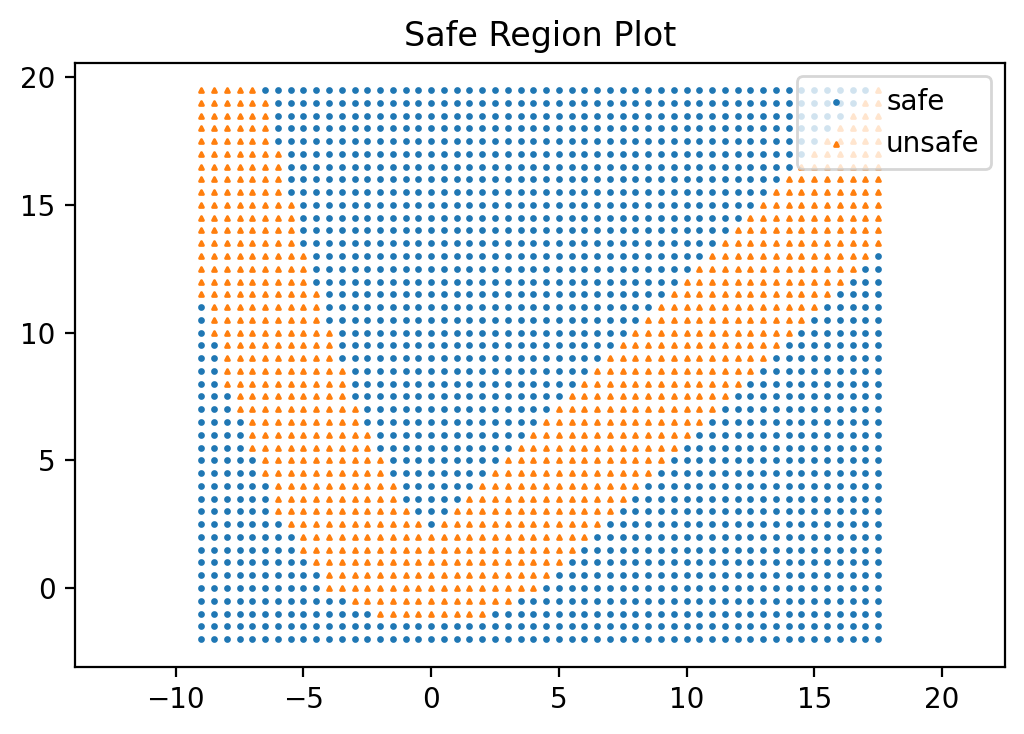

In [15]:
xbounds = (-9, 18)
ybounds = (-2, 20)
resolution = 0.5
plot_condition(x, y, numeric_acas.clause, xbounds, ybounds, resolution=resolution)

# Adler 2019 UAV

In [74]:
def full_adler(params):
    t0 = time.time()

    x, y = symbols("x y")
    
    R = Symbol("R", real=True, positive=True, nonzero=True) 
    theta = Symbol('theta', real=True, positive=True, nonzero=True)
    w = Symbol("w", real=True, positive=True, nonzero=True) 

    hexagon = RegularPolygon(Point(0, 0), w, 6)

    bound = R / sqrt(tan(theta)**2 + 1)

    traj_piecewise = Piecewise(
                        (sqrt(R**2 - x**2), x > bound),
                        (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))
    
    piecewise_intervals = [Interval(bound, R), Interval(-oo, bound)]
    piecewise_intervals = [sub_int.subs(params) for sub_int in piecewise_intervals]

    clauses_hex, explicit_hex = compute_unsafe_conds_symbolic(
        x, y,
        hexagon.subs(params),
        traj_piecewise.subs(params),
        domain=Reals,
        intervals=piecewise_intervals,
    )
    
    symbolic_time = time.time() - t0
    print(f"Took {symbolic_time} seconds to compute symbolic safe region")
    inst_begin_time = time.time()
    
    numeric_params = dict([(R, 4), (theta, pi/3), (w, 2)])
    for (k, v) in params:
        if k in numeric_params:
            numeric_params.pop(k)
            
    numeric_acas = explicit_acas.instantiate(list(numeric_params.items()))
    inst_duration = time.time() - inst_begin_time
    total_duration = time.time() - t0
#     print(f"Took {time.time() - t0} seconds to instantiate")
#     print(numeric_acas.ordering)
#     numeric_acas.clause
    print(f"Took {inst_duration} seconds to instantiate and {total_duration} seconds total.")
    return symbolic_time, inst_duration, total_duration    

In [75]:
R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
w = Symbol("w", real=True, positive=True, nonzero=True) 

In [79]:
full_adler([])

Took 44.97182321548462 seconds to compute symbolic safe region
Took 0.04816007614135742 seconds to instantiate and 45.02008390426636 seconds total.


In [83]:
full_adler([(w, 2)])

Took 38.006564140319824 seconds to compute symbolic safe region
Took 0.020237207412719727 seconds to instantiate and 38.0268931388855 seconds total.


In [220]:
full_adler([(R, 4), (theta, pi/3)])

Took 0.8217787742614746 seconds to compute symbolic safe region
Took 6.508827209472656e-05 seconds to instantiate and 0.821915864944458 seconds total.


In [221]:
full_adler([(R, 4), (theta, pi/3), (w, 2)])

Took 0.48080897331237793 seconds to compute symbolic safe region
Took 7.033348083496094e-05 seconds to instantiate and 0.48096799850463867 seconds total.


## Symbolic hexagon shape

In [209]:
params = [(R, 4), (theta, pi/3)]
# params = [(theta, pi/3)]

In [210]:
hexagon.subs(params)

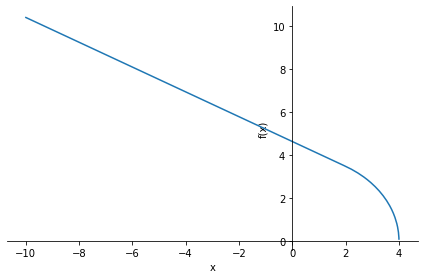

In [211]:
plot(traj_piecewise.subs(params))

In [212]:
t0 = time.time()

x, y = symbols("x y")

R = Symbol("R", real=True, positive=True, nonzero=True) 
theta = Symbol('theta', real=True, positive=True, nonzero=True)
w = Symbol("w", real=True, positive=True, nonzero=True) 

hexagon = RegularPolygon(Point(0, 0), w, 6)

bound = R / sqrt(tan(theta)**2 + 1)

traj_piecewise = Piecewise(
                    (sqrt(R**2 - x**2), x > bound),
                    (-1/tan(theta)*(x-R*cos(theta)) + R*sin(theta), x <= bound))

piecewise_intervals = [Interval(bound, R), Interval(-oo, bound)]
piecewise_intervals = [sub_int.subs(params) for sub_int in piecewise_intervals]

transitions, lookup, func_var = compute_all_transitions(
    x,
    y,
#     hexagon,
#     traj_piecewise,
    hexagon.subs(params),
    traj_piecewise.subs(params),
    domain=Reals,
    intervals=piecewise_intervals,
)

In [213]:
traj_piecewise.subs(params)

⎧      _________               
⎪     ╱       2                
⎪   ╲╱  16 - x        for x > 2
⎨                              
⎪  √3⋅(x - 2)                  
⎪- ────────── + 2⋅√3  otherwise
⎩      3                       

In [214]:
compute_all_transitions(x,y, hexagon, traj_piecewise.subs(params), domain=Reals, intervals =piecewise_intervals)

({Boundary(-oo, oo),
  Boundary(2, 2*sqrt(3)),
  Boundary(4, 0),
  Transition(-2*sqrt(3), 2),
  Transition(0, 4),
  Transition(2*sqrt(3), 2)},
 {-2*sqrt(3): [sqrt(16 - x**2), sqrt(16 - x**2)],
  0: [sqrt(16 - x**2), sqrt(16 - x**2)],
  2*sqrt(3): [sqrt(16 - x**2), sqrt(16 - x**2)],
  2: [sqrt(16 - x**2), -sqrt(3)*(x - 2)/3 + 2*sqrt(3)],
  4: [sqrt(16 - x**2)],
  -oo: [-sqrt(3)*(x - 2)/3 + 2*sqrt(3)]},
 x)

In [215]:
transitions

{Boundary(-oo, oo),
 Boundary(2, 2*sqrt(3)),
 Boundary(4, 0),
 Transition(-2*sqrt(3), 2),
 Transition(0, 4),
 Transition(2*sqrt(3), 2)}

In [216]:
lookup

In [217]:
transition_orderings = sort_or_order(transitions, lookup, func_var)

{2, -oo, 4}


In [218]:
transition_orderings

[[Boundary(-oo, oo), Boundary(2, 2*sqrt(3)), Boundary(4, 0)],
 [Boundary(-oo, oo),
  Boundary(2, 2*sqrt(3)),
  Transition(2*sqrt(3), 2),
  Boundary(4, 0)]]

In [196]:
transitions

{Boundary(-oo, oo),
 Boundary(R, 0),
 Boundary(R/2, sqrt(3)*R/2),
 Transition(-sqrt(3)*R/2, R/2),
 Transition(0, R),
 Transition(sqrt(3)*R/2, R/2)}

In [197]:
transition_orderings

[[Boundary(-oo, oo), Boundary(R/2, sqrt(3)*R/2), Boundary(R, 0)],
 [Boundary(-oo, oo),
  Boundary(R/2, sqrt(3)*R/2),
  Transition(sqrt(3)*R/2, R/2),
  Boundary(R, 0)]]

In [198]:
var_to_transition

{0: [Transition(0, 4)],
 -2*sqrt(3): [Transition(-2*sqrt(3), 2)],
 2*sqrt(3): [Transition(2*sqrt(3), 2)],
 4: [Boundary(4, 0)],
 -oo: [Boundary(-oo, oo)],
 2: [Boundary(2, 2*sqrt(3))]}

In [199]:
var_to_transition: Dict = {}
for transition in transitions:
    lookup_coord = getattr(transition.point, str(func_var))
    if lookup_coord in var_to_transition:
        var_to_transition[lookup_coord].append(transition)
    else:
        var_to_transition[lookup_coord] = [transition]

In [142]:
transition_orderings

[[Boundary(-oo, oo),
  Transition(-2*sqrt(3), 2),
  Transition(0, 4),
  Boundary(2, 2*sqrt(3)),
  Transition(2*sqrt(3), 2),
  Boundary(4, 0)]]

In [158]:
t0 = [tp.point.x for tp in transition_orderings[0][1:]]

In [159]:
check_ordering(t0, var_to_transition, lookup, True, False)

-2*sqrt(3)
set()


False

In [201]:
clauses_hex, explicit_hex = compute_unsafe_conds_symbolic(
    x, y,
    hexagon.subs(params),
    traj_piecewise.subs(params),
    domain=Reals,
    intervals=piecewise_intervals,
    print_runtime=True,
    print_orderings=True,
)

symbolic_time = time.time() - t0
print(f"Took {symbolic_time} seconds to compute symbolic safe region")
inst_begin_time = time.time()

numeric_params = dict([(R, 4), (theta, pi/3), (w, 2)])
for (k, v) in params:
    if k in numeric_params:
        numeric_params.pop(k)

numeric_acas = explicit_acas.instantiate(list(numeric_params.items()))
inst_duration = time.time() - inst_begin_time
total_duration = time.time() - t0
#     print(f"Took {time.time() - t0} seconds to instantiate")
#     print(numeric_acas.ordering)
#     numeric_acas.clause
print(f"Took {inst_duration} seconds to instantiate and {total_duration} seconds total.")

{R/2, -oo, R}
[Boundary(-oo, oo),
Boundary(R/2, sqrt(3)*R/2),
Boundary(R, 0)]
[Boundary(-oo, oo),
Boundary(R/2, sqrt(3)*R/2),
Transition(sqrt(3)*R/2, R/2),
Boundary(R, 0)]

Took 0.0015139579772949219 seconds to compute 2 possible orderings.
Took 1.0373399257659912 seconds to compute 2 clauses
Took 48.55754899978638 seconds to compute symbolic safe region
Took 0.03568220138549805 seconds to instantiate and 48.59331822395325 seconds total.


In [ ]:
params = [(R, 4), (theta, pi/3)]